In [146]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
import seaborn as sns

# 1. Matplotlib에서 마이너스 기호가 깨지는 현상 방지
# (설정된 폰트 대신 유니코드 마이너스 기호(U+2212)를 사용하도록 설정)
plt.rcParams['axes.unicode_minus'] = False

# 한글 폰트
font_path = 'NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'

In [147]:
data = pd.read_csv("data_1022.csv")

In [148]:
data

,age,gender,breakfast,height,weight,sleep_hours,depression,bmi,stress_level,exercise_score,...,economic_active,drink,oral_health,chewing_difficulty,smoking_ever,diet_status,housing_type,basic_recipient,EQ5D_pain_score,EQ5D_anxiety_depression
0,31,1,2,181.0,88.0,7.0,2.0,26.861207,2,10,...,1,1,3,5,2,1.0,2,3,1,1.0
1,29,2,4,162.0,56.0,7.0,2.0,21.338211,4,7,...,1,1,2,5,2,1.0,2,3,1,1.0
2,37,1,2,170.0,65.0,6.0,2.0,22.491349,1,11,...,1,1,2,5,1,1.0,2,3,1,1.0
3,36,2,4,160.0,55.0,6.0,2.0,21.484375,3,11,...,1,1,2,5,1,1.0,2,3,1,1.0
4,89,2,1,150.0,58.0,8.0,2.0,25.777778,2,5,...,2,2,5,4,2,2.0,2,3,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19813,68,2,1,160.0,54.0,6.0,1.0,21.093750,3,7,...,2,1,5,2,2,2.0,1,3,2,3.0
19814,64,1,1,150.0,56.0,5.0,2.0,24.888889,3,7,...,2,1,4,4,1,2.0,1,1,1,2.0
19815,56,2,1,150.0,60.0,8.0,2.0,26.666667,1,0,...,2,2,2,4,2,2.0,1,1,1,1.0
19816,54,1,1,177.0,89.0,6.0,2.0,28.408184,3,8,...,1,2,1,5,2,1.0,1,3,1,1.0


In [149]:
# x, y 변수 선택

x_col =['age', 'gender','breakfast','sleep_hours',
       'bmi', 'exercise_score','subjective_health', 
        #'diet_status','EQ5D_anxiety_depression','basic_recipient','housing_type',  'good_mental_health', 'drink',
     'income','happy','missed_medical_care','educate','is_married','economic_active',
       'oral_health','chewing_difficulty', 'smoking_ever',
      'EQ5D_pain_score', ]
y_col = ['has_hypertension', 'has_diabetes', 'has_chronic','has_depression']

#x - 삭제  :   'diet_status','EQ5D_anxiety_depression''basic_recipient','housing_type',   'good_mental_health' 'drink',


x = data[x_col]
y = data[y_col[2]]

In [150]:
# Feature Engineering - 피쳐중요도가 높던 나이와 BMI의 상관관계를 나타내는 변수 추가

x.loc[:,'age*bmi'] = x['age'].copy() * x['bmi'].copy()

x.loc[:,'age*bmi']

C:\Users\user\AppData\Local\Temp\ipykernel_15356\1449525670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:,'age*bmi'] = x['age'].copy() * x['bmi'].copy()


0         832.697415
1         618.808109
2         832.179931
3         773.437500
4        2294.222222
            ...     
19813    1434.375000
19814    1592.888889
19815    1493.333333
19816    1534.041942
19817    1254.056247
Name: age*bmi, Length: 19818, dtype: float64

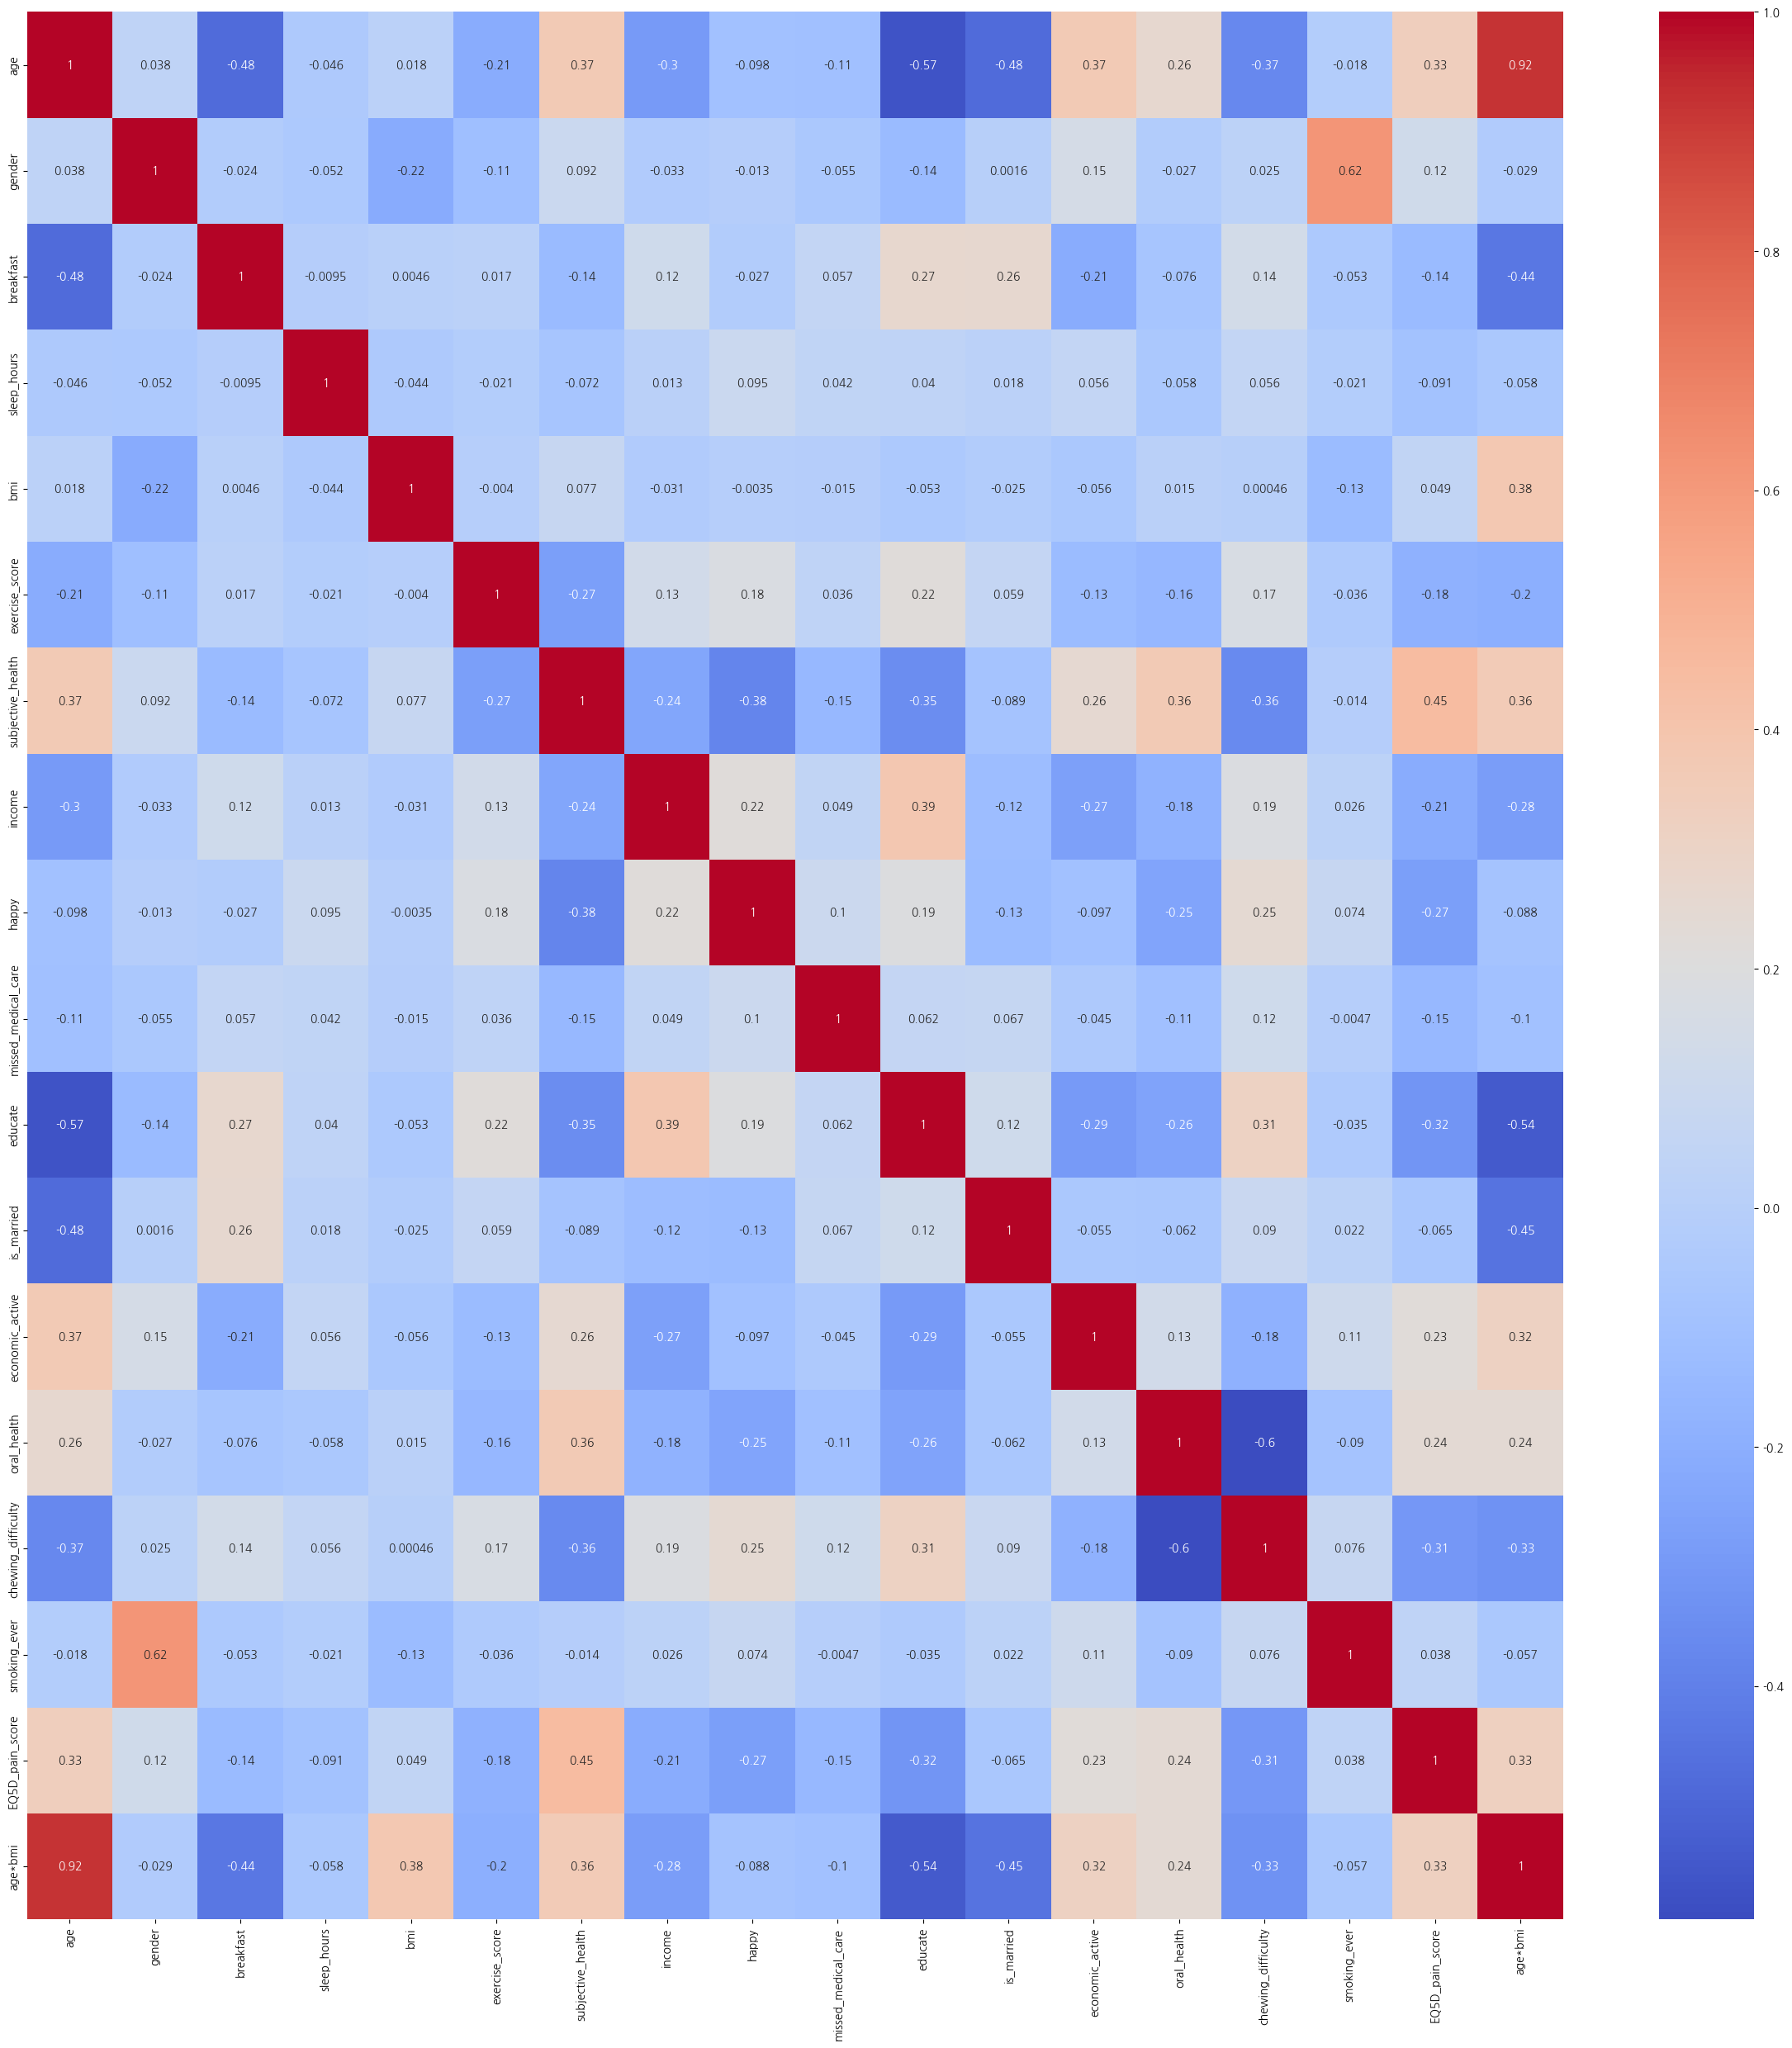

In [151]:
plt.figure(figsize=(30,30))
x_cor = x.corr()
sns.heatmap(x_cor,cmap = 'coolwarm', annot=True)
plt.savefig("corr.png")
plt.show()

In [152]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i)
                         for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    return vif
    
vif = feature_engineering_XbyVIF(x)
print(vif)

    VIF_Factor              Feature
0   203.091477                  age
1    18.352410               gender
2     4.392658            breakfast
3    26.709767          sleep_hours
4   172.443331                  bmi
5     5.212765       exercise_score
6    17.102134    subjective_health
7     3.600092               income
8    21.545771                happy
9    40.720815  missed_medical_care
10   22.235637              educate
11    4.262396           is_married
12   11.744150      economic_active
13   18.237492          oral_health
14   23.621527   chewing_difficulty
15   20.889023         smoking_ever
16   10.638329      EQ5D_pain_score
17  237.061770              age*bmi


In [153]:
#인코딩

marriage_map = {
    1: 'Married',
    2: 'Married',
    3: 'Single',
    4: 'Single',
    5: 'Single',
}
x['marriage_group'] = x['is_married'].copy().map(marriage_map)
x = x.drop('is_married',axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_15356\2293442479.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['marriage_group'] = x['is_married'].copy().map(marriage_map)


In [154]:
dum_col = ['marriage_group']


x_dummies = pd.get_dummies(x, columns =dum_col)
x_dummies

,age,gender,breakfast,sleep_hours,bmi,exercise_score,subjective_health,income,happy,missed_medical_care,educate,economic_active,oral_health,chewing_difficulty,smoking_ever,EQ5D_pain_score,age*bmi,marriage_group_Married,marriage_group_Single
0,31,1,2,7.0,26.861207,10,2,1000.0,10.0,1,8.0,1,3,5,2,1,832.697415,True,False
1,29,2,4,7.0,21.338211,7,2,1000.0,8.0,2,8.0,1,2,5,2,1,618.808109,True,False
2,37,1,2,6.0,22.491349,11,3,300.0,5.0,2,5.0,1,2,5,1,1,832.179931,True,False
3,36,2,4,6.0,21.484375,11,2,300.0,6.0,2,6.0,1,2,5,1,1,773.437500,True,False
4,89,2,1,8.0,25.777778,5,4,50.0,10.0,2,5.0,2,5,4,2,1,2294.222222,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19813,68,2,1,6.0,21.093750,7,4,55.0,5.0,1,3.0,2,5,2,2,2,1434.375000,False,True
19814,64,1,1,5.0,24.888889,7,2,150.0,4.0,2,4.0,2,4,4,1,1,1592.888889,True,False
19815,56,2,1,8.0,26.666667,0,2,150.0,10.0,2,3.0,2,2,4,2,1,1493.333333,True,False
19816,54,1,1,6.0,28.408184,8,2,400.0,7.0,2,8.0,1,1,5,2,1,1534.041942,True,False


In [155]:
dumed_col = x_dummies.columns[-2:]
scale_col = x_dummies.columns[:-2]

print(dumed_col, scale_col)

Index(['marriage_group_Married', 'marriage_group_Single'], dtype='object') Index(['age', 'gender', 'breakfast', 'sleep_hours', 'bmi', 'exercise_score',
       'subjective_health', 'income', 'happy', 'missed_medical_care',
       'educate', 'economic_active', 'oral_health', 'chewing_difficulty',
       'smoking_ever', 'EQ5D_pain_score', 'age*bmi'],
      dtype='object')


### 훈련 데이터 / 테스트 데이터 분리

In [156]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_dummies,y,test_size=0.3, random_state=0, stratify=y)

### 스케일링 - MinMaxScaler

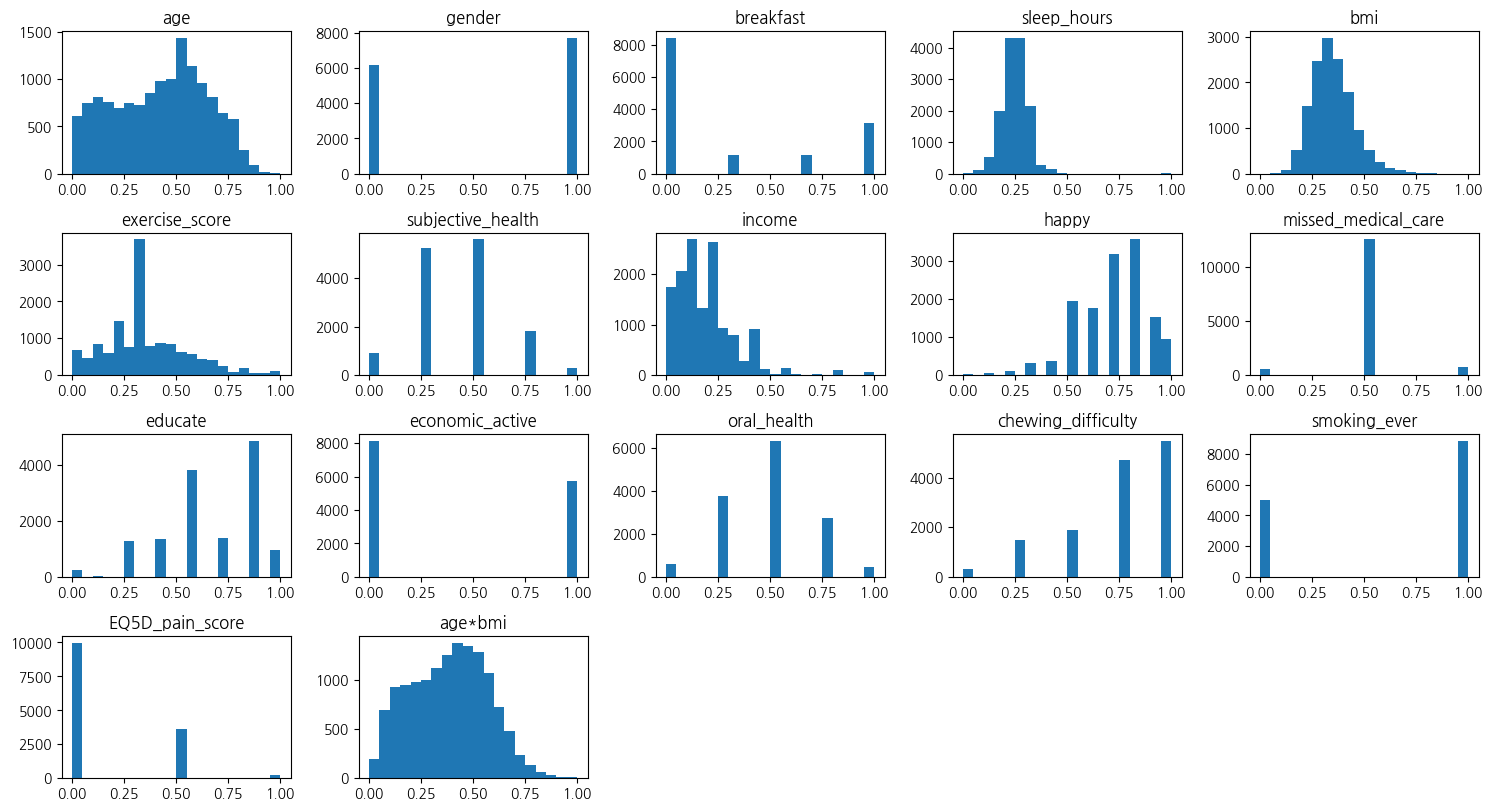

In [157]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

xcol = scale_col

scaler = MinMaxScaler()
scaler.fit(x_train[xcol])           
scale_X = scaler.transform(x_train[xcol])    #train - x 데이터 스케일링
x_test_scale = scaler.transform(x_test[xcol]) #test - x 데이터 스케일링


x_train[xcol] = scale_X
x_test[xcol] = x_test_scale

plt.figure(figsize=(15,10))

for i in range(scale_X.shape[1]):
    ax = plt.subplot(5,5, i+1)
    ax.hist(scale_X[:,i], bins=20)
    plt.title(x_train.columns[i])

plt.tight_layout()

plt.show()

# 머신러닝

1. SVC
   - 가중치 추가
   - 파라미터 튜닝
2. RandomForest
   - 가중치 추가
3. XGBoost
    - 하이퍼 파라미터 튜닝
    - 
4. LightGBM

In [160]:
#SVC 

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

svc = SVC(C=10, 
         # class_weight = 'balanced', 
          random_state=0)
svc.fit(x_train, y_train)
predict_svc = svc.predict(x_test)


report_scv = classification_report(y_test, predict_svc)
print("==========SCV성능===============")
print(report_scv)

==========SCV성능===============
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      4030
           1       0.65      0.60      0.63      1916

    accuracy                           0.77      5946
   macro avg       0.73      0.72      0.73      5946
weighted avg       0.76      0.77      0.77      5946



In [161]:
#SVC 가중치 추가
svc = SVC(C=10, 
         class_weight = 'balanced', 
          random_state=0)
svc.fit(x_train, y_train)
predict_svc = svc.predict(x_test)


report_scv = classification_report(y_test, predict_svc)
print("==========SCV성능===============")
print(report_scv)

==========SCV성능===============
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      4030
           1       0.57      0.83      0.68      1916

    accuracy                           0.74      5946
   macro avg       0.73      0.77      0.73      5946
weighted avg       0.79      0.74      0.75      5946



In [176]:
from sklearn.model_selection import GridSearchCV
# 1. 파라미터 튜닝
param_grid_svc = {
    'C': [0.1, 1, 10, 50],             # 오류 허용 규제 (낮을수록 오류 허용)
    'gamma': ['scale', 'auto', 0.1],  # 결정 경계의 복잡도
    'kernel': ['rbf']                 # 커널 (rbf가 일반적)
}
grid_search_svc = GridSearchCV(estimator=svc, param_grid= param_grid_svc,
                              cv = 3, scoring='f1', n_jobs=-1, verbose =2)

grid_search_svc.fit(x_train, y_train)

print(f"SVC Best parameters : {grid_search_svc.best_params_}")
print(f"SVC Best f1 Score: {grid_search_svc.best_score_:.4f}")
best_svc = grid_search_svc.best_estimator_
pred_svc_best = best_svc.predict(x_test)

print(f"\n Best SVC Report\n{classification_report(y_test, pred_svc_best)}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
SVC Best parameters : {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
SVC Best f1 Score: 0.6855

 Best SVC Report
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      4030
           1       0.58      0.84      0.68      1916

    accuracy                           0.75      5946
   macro avg       0.74      0.77      0.74      5946
weighted avg       0.80      0.75      0.76      5946



### RandomForest 앙상블

In [162]:
#RandomFoest 앙상블 모델

from sklearn.ensemble import RandomForestClassifier

rc = RandomForestClassifier(
    #class_weight = 'balanced', 
    random_state=0)
rc.fit(x_train, y_train)
pred_rc = rc.predict(x_test)

report_rc = classification_report(y_test, pred_rc)
print("============RandomForest============")
print(report_rc)

============RandomForest============
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      4030
           1       0.65      0.61      0.63      1916

    accuracy                           0.77      5946
   macro avg       0.73      0.73      0.73      5946
weighted avg       0.76      0.77      0.77      5946



In [164]:
#RandomFoest 앙상블 모델 가중치

from sklearn.ensemble import RandomForestClassifier

rc = RandomForestClassifier(
    class_weight = 'balanced', 
    random_state=0)
rc.fit(x_train, y_train)
pred_rc = rc.predict(x_test)

report_rc = classification_report(y_test, pred_rc)
print("============RandomForest============")
print(report_rc)

============RandomForest============
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      4030
           1       0.66      0.59      0.62      1916

    accuracy                           0.77      5946
   macro avg       0.73      0.72      0.73      5946
weighted avg       0.76      0.77      0.76      5946



In [166]:
#랜덤 포레스트 파라미터 튜닝

# 1. 튜닝할 파라미터
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # 트리의 개수
    'max_depth': [None, 10, 20, 30],     # 트리의 최대 깊이 (None은 제한 없음)
    'min_samples_split': [2, 5],     # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2]       # 리프 노드가 되기 위한 최소 샘플 수
}

# 2. GridSearchCV 객체 생성
rf = RandomForestClassifier(class_weight='balanced', random_state=0)

# cv=3 (3-Fold CV), scoring='roc_auc' (불균형 데이터에 유리한 평가지표)
# n_jobs=-1 (CPU 모두 사용), verbose=2 (진행 상황 출력)
grid_search_rf = GridSearchCV(estimator=rf, 
                              param_grid=param_grid_rf, 
                              cv=3, 
                              scoring='f1',
                              n_jobs=-1, 
                              verbose=2)

# 3. 튜닝 시작 (x_train, y_train 사용)
grid_search_rf.fit(x_train, y_train)

# 4. 최적의 파라미터 및 점수 확인
print(f"RandomForest Best Parameters: {grid_search_rf.best_params_}")
print(f"RandomForest Best f1 Score: {grid_search_rf.best_score_:.4f}")

# 5. 최적의 모델로 x_test 예측 및 평가
best_rf = grid_search_rf.best_estimator_
pred_rf_best = best_rf.predict(x_test)

print("\n--- Best RandomForest Classification Report ---")
print(classification_report(y_test, pred_rf_best))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
RandomForest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
RandomForest Best f1 Score: 0.6825

--- Best RandomForest Classification Report ---
              precision    recall  f1-score   support

           0       0.89      0.74      0.80      4030
           1       0.59      0.80      0.68      1916

    accuracy                           0.76      5946
   macro avg       0.74      0.77      0.74      5946
weighted avg       0.79      0.76      0.76      5946



In [167]:
#랜덤 포레스트 피쳐 중요도

importances = best_rf.feature_importances_
feature_names = x_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print(feat_imp)

age*bmi                   0.323016
age                       0.237063
bmi                       0.071716
educate                   0.071211
subjective_health         0.051322
income                    0.042901
breakfast                 0.037870
exercise_score            0.029667
happy                     0.019941
sleep_hours               0.017171
economic_active           0.015937
chewing_difficulty        0.014552
EQ5D_pain_score           0.014497
oral_health               0.014009
gender                    0.010163
missed_medical_care       0.007956
smoking_ever              0.007840
marriage_group_Single     0.007261
marriage_group_Married    0.005908
dtype: float64


### XGBoost

In [169]:
from xgboost import XGBClassifier

scale_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"XGBoost scale_pos_weight: {scale_weight:.2f}")

xgb = XGBClassifier(scale_pos_weight= scale_weight, random_state=0,
                   n_estimators = 200, early_stopping_rounds=10)

eval_set = [(x_test, y_test)]
xgb.fit(x_train, y_train, eval_set = eval_set, verbose =False)

predict_xgb = xgb.predict(x_test)

print(classification_report(y_test,predict_xgb))

XGBoost scale_pos_weight: 2.10
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      4030
           1       0.58      0.81      0.68      1916

    accuracy                           0.75      5946
   macro avg       0.74      0.77      0.74      5946
weighted avg       0.79      0.75      0.76      5946



In [172]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


# 1. scale_pos_weight 값 계산 (0 클래스 수 / 1 클래스 수)
scale_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"XGBoost scale_pos_weight: {scale_weight:.2f}")

# 2. 튜닝할 기본 모델 정의
xgb = XGBClassifier(scale_pos_weight=scale_weight, 
                    random_state=0)

# 3. 튜닝할 파라미터 후보 목록 (XGBoost 용)
param_dist_xgb = {
    'n_estimators': [100, 200, 300, 500],       # 트리 개수
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   # 학습률
    'max_depth': [3, 5, 7, 10],                # 최대 깊이
    'gamma': [0, 0.1, 0.5, 1],                 # 과적합 제어
    'subsample': [0.7, 0.8, 0.9, 1.0],         # 데이터 샘플링 비율
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]   # 피처 샘플링 비율
}

# 4. RandomizedSearchCV 객체 생성
n_iter = 50  # 80회 -> 50회로 줄여서 속도 향상
cv_folds = 3 # 5겹 -> 3겹으로 줄여서 속도 향상

rs_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=n_iter,
    cv=cv_folds,
    scoring='f1',  # F1 Score 기준으로 최적화
    n_jobs=-1,
    random_state=0,
    verbose=2
)

# 5. 튜닝 시작
rs_xgb.fit(x_train, y_train_flat)

# 6. 최적의 파라미터 및 점수 확인
print(f"XGBoost Best Parameters: {rs_xgb.best_params_}")
print(f"XGBoost Best F1 Score (from CV): {rs_xgb.best_score_:.4f}")

# 7. 최적의 모델로 x_test 예측 및 최종 평가
best_xgb = rs_xgb.best_estimator_
predict_xgb_best = best_xgb.predict(x_test)

print("\n--- Best XGBoost Classification Report ---")
print(classification_report(y_test, predict_xgb_best))

XGBoost scale_pos_weight: 2.10
Fitting 3 folds for each of 50 candidates, totalling 150 fits
XGBoost Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 1.0}
XGBoost Best F1 Score (from CV): 0.6876

--- Best XGBoost Classification Report ---
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      4030
           1       0.58      0.83      0.69      1916

    accuracy                           0.75      5946
   macro avg       0.74      0.77      0.74      5946
weighted avg       0.80      0.75      0.76      5946



In [177]:
from sklearn.metrics import precision_recall_curve, f1_score
import numpy as np

# 1. 튜닝된 최적의 XGBoost 모델(best_xgb)
best_model_xgb = rs_xgb.best_estimator_ 

# 2. Test 데이터에 대한 'Class 1'의 예측 확률
pred_proba_xgb = best_model_xgb.predict_proba(x_test)[:, 1]

# 3. Precision, Recall, Thresholds 계산
precision, recall, thresholds = precision_recall_curve(y_test, pred_proba_xgb)

# 4. F1-Score가 최대가 되는 임계값(threshold) 찾기
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])

# F1 스코어가 NaN인 경우(0/0)를 0으로 처리 (0 나누기 방지)
f1_scores = np.nan_to_num(f1_scores)

best_threshold_xgb = thresholds[np.argmax(f1_scores)]
best_f1_xgb = np.max(f1_scores)

print(f"XGBoost 최적의 임계값(Threshold): {best_threshold_xgb:.4f}")
print(f"XGBoost 임계값 적용 시 최대 F1 Score: {best_f1_xgb:.4f}")

# 5. 새로운 임계값으로 최종 예측
final_pred_xgb = (pred_proba_xgb >= best_threshold_xgb).astype(int)

print("\n--- Threshold 조정 후 Best XGBoost Report ---")
print(classification_report(y_test, final_pred_xgb))

XGBoost 최적의 임계값(Threshold): 0.4882
XGBoost 임계값 적용 시 최대 F1 Score: 0.6868

--- Threshold 조정 후 Best XGBoost Report ---
              precision    recall  f1-score   support

           0       0.91      0.71      0.79      4030
           1       0.58      0.84      0.69      1916

    accuracy                           0.75      5946
   macro avg       0.74      0.78      0.74      5946
weighted avg       0.80      0.75      0.76      5946



In [179]:
importances = best_model_xgb.feature_importances_
feature_names = x_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print(feat_imp)

age*bmi                   0.549065
subjective_health         0.065501
gender                    0.045247
educate                   0.041853
age                       0.036238
smoking_ever              0.034023
missed_medical_care       0.029807
bmi                       0.025369
income                    0.024354
breakfast                 0.022690
sleep_hours               0.020389
exercise_score            0.019535
economic_active           0.018830
happy                     0.018160
chewing_difficulty        0.017970
oral_health               0.015062
EQ5D_pain_score           0.007983
marriage_group_Married    0.007926
marriage_group_Single     0.000000
dtype: float32


In [186]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

#Train data -> 오버샘플링
x_train_over, y_train_over = smote.fit_resample(x_train,y_train)
print(y_train_over.value_counts())

# 만성질환인사람 / 만성질환이 아닌사람 데이터의 수가 같아짐. 

has_chronic
0    9402
1    9402
Name: count, dtype: int64


### SMOTE 오버샘플링

In [187]:
xgb_smote = XGBClassifier(random_state=0)

#  튜닝할 파라미터 후보 목록
param_dist_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'gamma': [0, 0.1, 0.5, 1],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

#  RandomizedSearchCV 객체 생성
n_iter = 50
cv_folds = 3

rs_xgb_smote = RandomizedSearchCV(
    estimator=xgb_smote,
    param_distributions=param_dist_xgb,
    n_iter=n_iter,
    cv=cv_folds,
    scoring='f1',  # F1 Score 기준
    n_jobs=-1,
    random_state=0,
    verbose=2
)

# (SMOTE로 오버샘플링된 x_train_over, y_train_over 사용)
rs_xgb_smote.fit(x_train_over, y_train_over)

# 최적의 파라미터 및 점수 확인
print(f"XGBoost (SMOTE) Best Parameters: {rs_xgb_smote.best_params_}")
print(f"XGBoost (SMOTE) Best F1 Score (from CV): {rs_xgb_smote.best_score_:.4f}")

# 최적의 모델로 *원본* x_test 예측 및 최종 평가
best_xgb_smote = rs_xgb_smote.best_estimator_
predict_xgb_smote = best_xgb_smote.predict(x_test)

print("\n--- Best XGBoost (SMOTE) Classification Report ---")
print(classification_report(y_test, predict_xgb_smote))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
XGBoost (SMOTE) Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 1.0}
XGBoost (SMOTE) Best F1 Score (from CV): 0.8010

--- Best XGBoost (SMOTE) Classification Report ---
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      4030
           1       0.59      0.78      0.67      1916

    accuracy                           0.76      5946
   macro avg       0.74      0.76      0.74      5946
weighted avg       0.79      0.76      0.76      5946



### LightGBM

In [173]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

# 1. 모델 생성 및 학습
lgbm = LGBMClassifier(is_unbalance=True,  # 불균형 데이터임을 명시
                      random_state=0,
                      n_estimators=200)  # 트리의 개수 (튜닝 필요)

lgbm.fit(x_train, y_train)


param = {
    'n_estimators': [100, 200, 300, 500],       # 트리 개수
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   # 학습률
    'max_depth': [5, 10, 15, 20],               # 최대 깊이
    'num_leaves': [15, 31, 63],                # 리프 노드 수 (max_depth보다 작아야 함)
    'subsample': [0.7, 0.8, 0.9, 1.0],         # 데이터 샘플링 비율
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]   # 피처 샘플링 비율
}
n_iter = 80

rs_lgbm = RandomizedSearchCV(estimator = lgbm,
                        param_distributions=param,
                        n_iter=n_iter, 
                        cv=5,
                        scoring ='f1',
                        n_jobs=-1,
                       random_state = 0,
                       verbose = 2)
rs_lgbm.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 4470, number of negative: 9402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 792
[LightGBM] [Info] Number of data points in the train set: 13872, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.322232 -> initscore=-0.743534
[LightGBM] [Info] Start training from score -0.743534
Fitting 5 folds for each of 80 candidates, totalling 400 fits
[LightGBM] [Info] Number of positive: 4470, number of negative: 9402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 792
[LightGBM] [Info] Number of data points in the train se

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(is_unbalance=True, n_estimators=200,
                                            random_state=0),
                   n_iter=80, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [5, 10, 15, 20],
                                        'n_estimators': [100, 200, 300, 500],
                                        'num_leaves': [15, 31, 63],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=0, scoring='f1', verbose=2)

In [175]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# 최적의 파라미터 및 점수 확인
print(f"LightGBM Best Parameters: {rs_lgbm.best_params_}")
print(f"LightGBM Best F1 Score (from CV): {rs_lgbm.best_score_:.4f}")

#  최적의 모델로 x_test 예측 및 최종 평가
best_lgbm = rs_lgbm.best_estimator_
predict_lgbm_best = best_lgbm.predict(x_test)

print("\n--- Best LightGBM Classification Report ---")
print(classification_report(y_test, predict_lgbm_best))

LightGBM Best Parameters: {'subsample': 0.7, 'num_leaves': 15, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
LightGBM Best F1 Score (from CV): 0.6868

--- Best LightGBM Classification Report ---
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      4030
           1       0.58      0.83      0.69      1916

    accuracy                           0.75      5946
   macro avg       0.74      0.77      0.74      5946
weighted avg       0.80      0.75      0.76      5946



In [71]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# 1. 튜닝된 최적의 LGBM 모델을 가져옵니다 
best_model = rs_lgbm.best_estimator_

# 2. Test 데이터에 대한 'Class 1'의 예측 확률을 가져옵니다.
pred_proba = best_model.predict_proba(x_test)[:, 1]

# 3. Precision, Recall, Thresholds 계산
precision, recall, thresholds = precision_recall_curve(y_test, pred_proba)

# 4. F1-Score가 최대가 되는 임계값(threshold) 찾기
# (thresholds는 precision/recall보다 길이가 1 작으므로 [:-1] 사용)
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])

# F1 스코어가 NaN인 경우(0/0)를 0으로 처리
f1_scores = np.nan_to_num(f1_scores)

best_threshold = thresholds[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)

print(f"최적의 임계값(Threshold): {best_threshold:.4f}")
print(f"임계값 적용 시 최대 F1 Score: {best_f1:.4f}")

# 5. 새로운 임계값으로 최종 예측
final_pred = (pred_proba >= best_threshold).astype(int)

print("\n--- Threshold 조정 후 Best LGBM Report ---")
print(classification_report(y_test, final_pred))

최적의 임계값(Threshold): 0.4587
임계값 적용 시 최대 F1 Score: 0.6874

--- Threshold 조정 후 Best LGBM Report ---
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      4030
           1       0.57      0.86      0.69      1916

    accuracy                           0.75      5946
   macro avg       0.74      0.78      0.74      5946
weighted avg       0.80      0.75      0.76      5946



In [178]:
importances = best_model.feature_importances_
feature_names = x_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print(feat_imp)

age*bmi                   1165
subjective_health          758
bmi                        427
age                        281
educate                    274
gender                     215
exercise_score             214
income                     198
happy                      150
missed_medical_care        148
smoking_ever               124
sleep_hours                 71
breakfast                   51
oral_health                 34
chewing_difficulty          31
economic_active             25
marriage_group_Married      20
EQ5D_pain_score             12
marriage_group_Single        2
dtype: int32


## 성능 정리 
__class 1 의 f1_score 기준__

### SVC
- SVC(가중치 x) : 0.63
- SVC(가중치 o) : 0.68
- SVC(파라미터 튜닝) : 0.685

### 랜덤 포레스트(앙상블)
- RandomForest(가중치 x) : 0.63
- RandomForest(가중치 o) : 0.62
- RandomForest(파라미터 튜닝) : 0.682


### XGBoost
- XGBoost(하이퍼 파라미터 튜닝) : 0.687
- +Thresholds : 0.686 (감소된 이유 : 다중공선성 의심 - age*bmi)
- SMOTE 오버샘플링 : 0.67 (과적합)

### LightGBM
- LightGBM(하이퍼 파라미터 튜닝) : 0.686
- +Thresholds : 0.687

## age*bmi 제거 후 XGBoost 다시 학습

In [195]:
x_col =['age', 'gender','breakfast','sleep_hours',
       'bmi', 'exercise_score','subjective_health', 
        #'diet_status','EQ5D_anxiety_depression','basic_recipient','housing_type',  'good_mental_health', 'drink','oral_health','chewing_difficulty',
     'income','happy','missed_medical_care','educate','is_married','economic_active',
        'smoking_ever',
      'EQ5D_pain_score', ]
y_col = ['has_hypertension', 'has_diabetes', 'has_chronic','has_depression']

#x - 삭제  :   'diet_status','EQ5D_anxiety_depression''basic_recipient','housing_type',   'good_mental_health' 'drink','oral_health',chewing_difficulty'


x = data[x_col]
y = data[y_col[2]]

In [196]:
marriage_map = {
    1: 'Married',
    2: 'Married',
    3: 'Single',
    4: 'Single',
    5: 'Single',
}
x['marriage_group'] = x['is_married'].copy().map(marriage_map)
x = x.drop('is_married',axis=1).copy()

dum_col = ['marriage_group']
x_dummies = pd.get_dummies(x, columns =dum_col)

dumed_col = x_dummies.columns[-2:]
scale_col = x_dummies.columns[:-2]

x_train, x_test, y_train, y_test = train_test_split(x_dummies,y,test_size=0.3, random_state=0, stratify=y)

xcol = scale_col

scaler = MinMaxScaler()
scaler.fit(x_train[xcol])           
scale_X = scaler.transform(x_train[xcol])    #train - x 데이터 스케일링
x_test_scale = scaler.transform(x_test[xcol]) #test - x 데이터 스케일링


x_train[xcol] = scale_X
x_test[xcol] = x_test_scale

#XGBoost

# 1. scale_pos_weight 값 계산 (0 클래스 수 / 1 클래스 수)
scale_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"XGBoost scale_pos_weight: {scale_weight:.2f}")

# 2. 튜닝할 기본 모델 정의
xgb = XGBClassifier(scale_pos_weight=scale_weight, 
                    random_state=0)

# 3. 튜닝할 파라미터 후보 목록 (XGBoost 용)
param_dist_xgb = {
    'n_estimators': [100, 200, 300, 500],       # 트리 개수
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   # 학습률
    'max_depth': [3, 5, 7, 10],                # 최대 깊이
    'gamma': [0, 0.1, 0.5, 1],                 # 과적합 제어
    'subsample': [0.7, 0.8, 0.9, 1.0],         # 데이터 샘플링 비율
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]   # 피처 샘플링 비율
}

# 4. RandomizedSearchCV 객체 생성
n_iter = 50  # 80회 -> 50회로 줄여서 속도 향상
cv_folds = 3 # 5겹 -> 3겹으로 줄여서 속도 향상

rs_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=n_iter,
    cv=cv_folds,
    scoring='f1',  # F1 Score 기준으로 최적화
    n_jobs=-1,
    random_state=0,
    verbose=2
)

# 5. 튜닝 시작
rs_xgb.fit(x_train, y_train_flat)

# 6. 최적의 파라미터 및 점수 확인
print(f"XGBoost Best Parameters: {rs_xgb.best_params_}")
print(f"XGBoost Best F1 Score (from CV): {rs_xgb.best_score_:.4f}")

# 7. 최적의 모델로 x_test 예측 및 최종 평가
best_xgb = rs_xgb.best_estimator_
predict_xgb_best = best_xgb.predict(x_test)

print("\n--- Best XGBoost Classification Report ---")
print(classification_report(y_test, predict_xgb_best))


# 1. 튜닝된 최적의 XGBoost 모델(best_xgb)
best_model_xgb = rs_xgb.best_estimator_ 

# 2. Test 데이터에 대한 'Class 1'의 예측 확률
pred_proba_xgb = best_model_xgb.predict_proba(x_test)[:, 1]

# 3. Precision, Recall, Thresholds 계산
precision, recall, thresholds = precision_recall_curve(y_test, pred_proba_xgb)

# 4. F1-Score가 최대가 되는 임계값(threshold) 찾기
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])

# F1 스코어가 NaN인 경우(0/0)를 0으로 처리 (0 나누기 방지)
f1_scores = np.nan_to_num(f1_scores)

best_threshold_xgb = thresholds[np.argmax(f1_scores)]
best_f1_xgb = np.max(f1_scores)

print(f"XGBoost 최적의 임계값(Threshold): {best_threshold_xgb:.4f}")
print(f"XGBoost 임계값 적용 시 최대 F1 Score: {best_f1_xgb:.4f}")

# 5. 새로운 임계값으로 최종 예측
final_pred_xgb = (pred_proba_xgb >= best_threshold_xgb).astype(int)

print("\n--- Threshold 조정 후 Best XGBoost Report ---")
print(classification_report(y_test, final_pred_xgb))

C:\Users\user\AppData\Local\Temp\ipykernel_15356\1643902571.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['marriage_group'] = x['is_married'].copy().map(marriage_map)


XGBoost scale_pos_weight: 2.10
Fitting 3 folds for each of 50 candidates, totalling 150 fits
XGBoost Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
XGBoost Best F1 Score (from CV): 0.6845

--- Best XGBoost Classification Report ---
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      4030
           1       0.58      0.84      0.69      1916

    accuracy                           0.75      5946
   macro avg       0.74      0.78      0.74      5946
weighted avg       0.80      0.75      0.76      5946

XGBoost 최적의 임계값(Threshold): 0.5002
XGBoost 임계값 적용 시 최대 F1 Score: 0.6856

--- Threshold 조정 후 Best XGBoost Report ---
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      4030
           1       0.58      0.84      0.69      1916

    accuracy                           0.75      5946
   macro avg       0.

In [197]:
importances = best_model_xgb.feature_importances_
feature_names = x_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print(feat_imp)

age                       0.290309
educate                   0.181132
breakfast                 0.090765
marriage_group_Single     0.075824
subjective_health         0.070692
bmi                       0.060455
marriage_group_Married    0.056649
gender                    0.035190
EQ5D_pain_score           0.024603
smoking_ever              0.024031
economic_active           0.021938
missed_medical_care       0.018082
income                    0.014642
sleep_hours               0.013586
exercise_score            0.011200
happy                     0.010901
dtype: float32


### 오버샘플링 + 피쳐 중요도 고려 결과
성능 향상하지 못했다

### 데이터 불균형 시각화

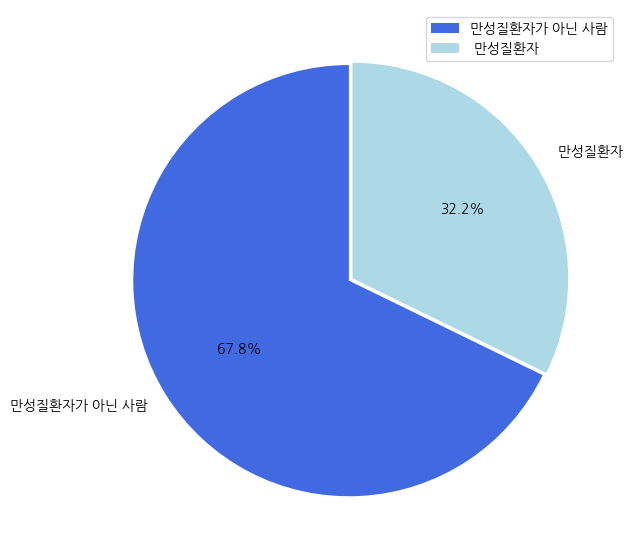

In [118]:
count = y_train.value_counts()

colors = ['royalblue', 'lightblue']

plt.figure(figsize=(7,7))
plt.pie(count, labels = ['만성질환자가 아닌 사람', ' 만성질환자'], colors = colors, autopct = "%.1f%%",  explode= [0.01, 0.01],
       startangle= 90)
plt.legend()
plt.savefig("pie.png")
plt.show()